## FACE EXPRESSION RECOGNITION USING CNN

# importing libraries

In [12]:
import numpy as np
import seaborn as sns
from keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import os

# visualizing the data

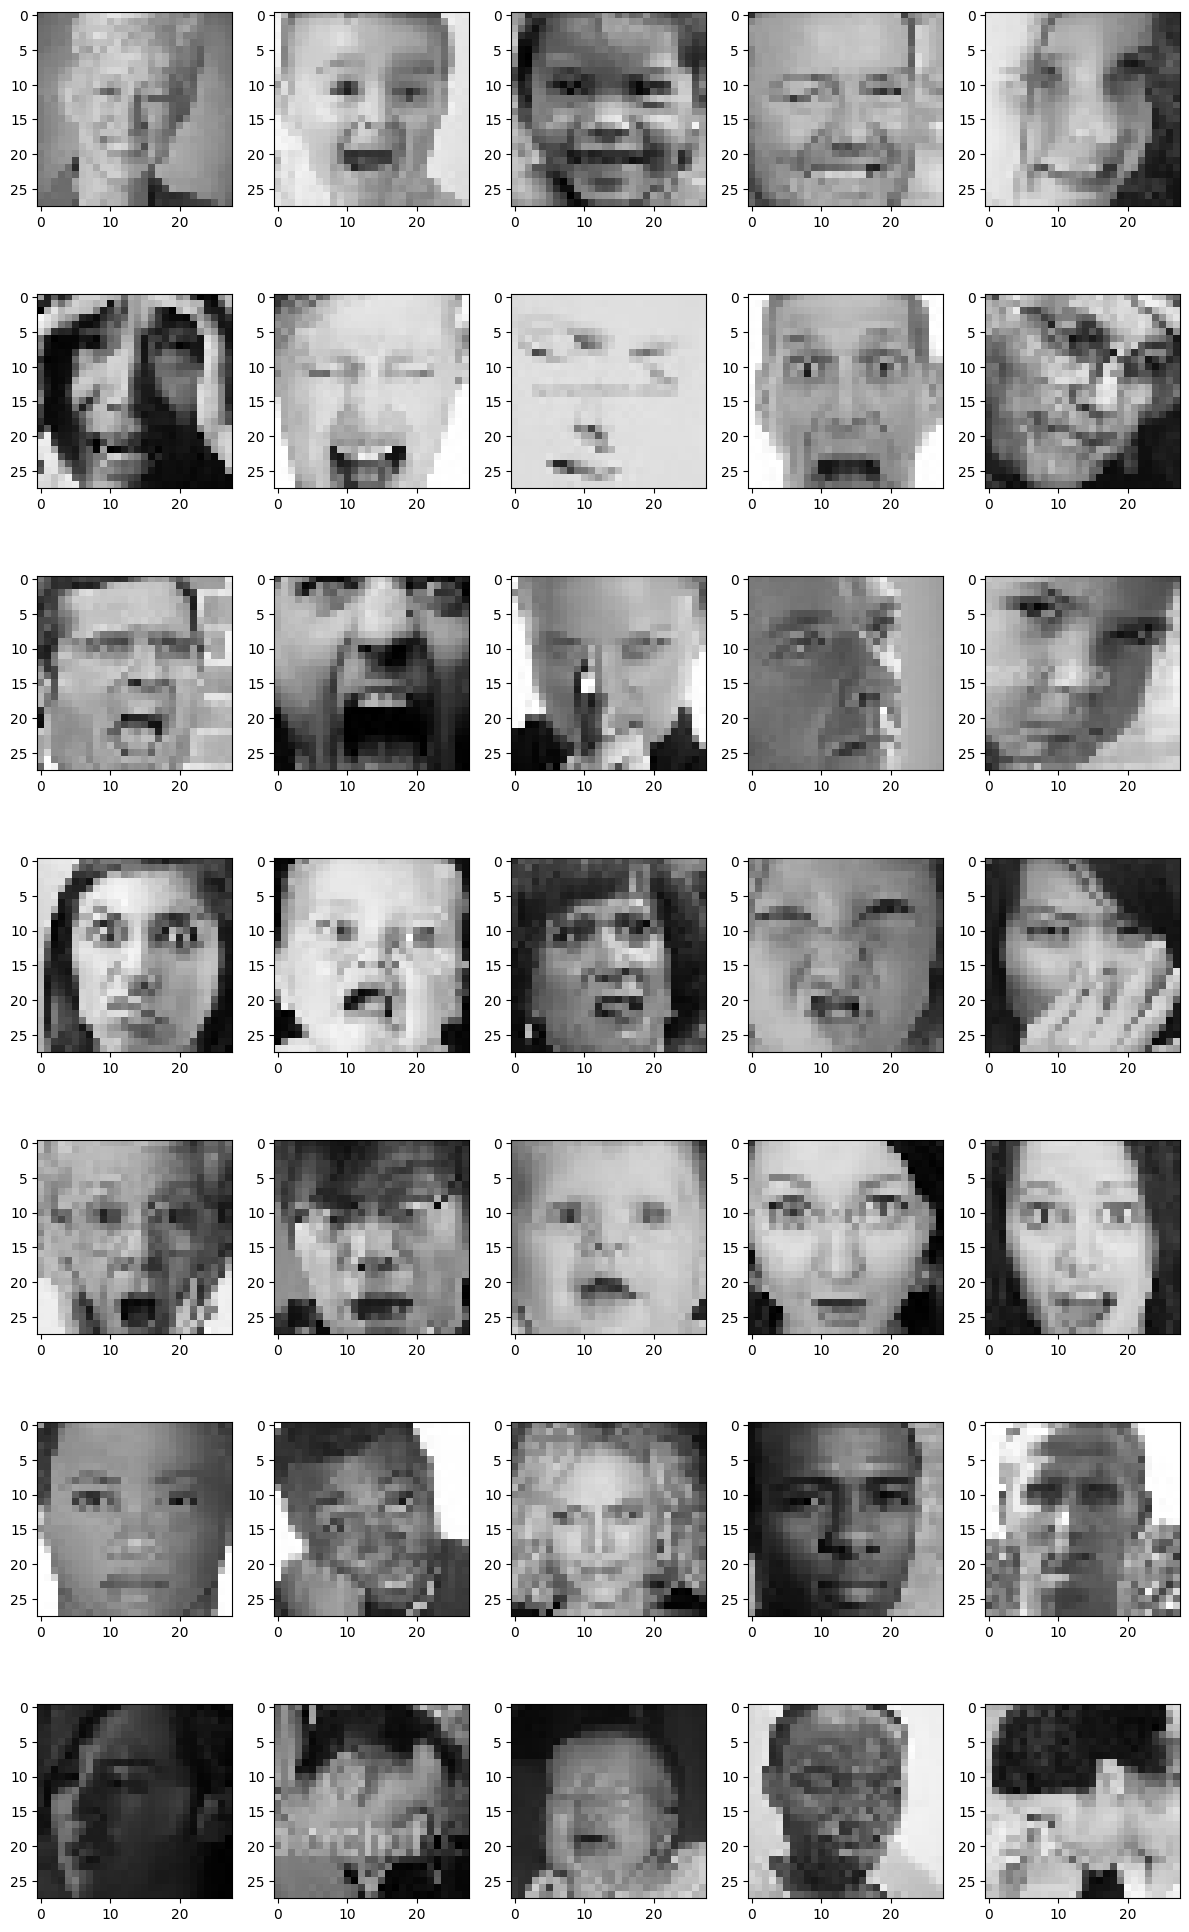

In [3]:


# size of the image: 28*28 pixels
pic_size = 28

# input path for the images
base_path = "/content/images/images/"

plt.figure(0, figsize=(12,20))
cpt = 0

for expression in os.listdir(base_path + "train/"):
    for i in range(1,6):
        cpt = cpt + 1
        plt.subplot(7,5,cpt)
        img = load_img(base_path + "train/" + expression + "/" +os.listdir(base_path + "train/" + expression)[i], target_size=(pic_size, pic_size))
        plt.imshow(img, cmap="gray")

plt.tight_layout()
plt.show()

# counting the number of images for each expression

In [4]:
for expression in os.listdir(base_path + "train"):
    print(str(len(os.listdir(base_path + "train/" + expression))) + " " + expression + " images")

7164 happy images
4103 fear images
3993 angry images
436 disgust images
3205 surprise images
4982 neutral images
4938 sad images


#data augmentation using image_data_generator

In [5]:
from keras.preprocessing.image import ImageDataGenerator

# number of images to feed into the NN for every batch
batch_size = 128

datagen_train = ImageDataGenerator()
datagen_validation = ImageDataGenerator()

train_generator = datagen_train.flow_from_directory(base_path + "train",
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

validation_generator = datagen_validation.flow_from_directory(base_path + "validation",
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


# CNN model

In [8]:
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras.models import Model, Sequential
from keras.optimizers import Adam

# number of possible label values
nb_classes = 7

# Initialising the CNN
model = Sequential()

# 1 - Convolution
model.add(Conv2D(64,(3,3), padding='same', input_shape=(28, 28,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(nb_classes, activation='softmax'))

opt = Adam(lr=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

#Fitting the model

In [9]:
%%time

# number of epochs to train the NN
epochs = 10

from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

history = model.fit_generator(generator=train_generator,
                                steps_per_epoch=train_generator.n//train_generator.batch_size,
                                epochs=epochs,
                                validation_data = validation_generator,
                                validation_steps = validation_generator.n//validation_generator.batch_size,
                                callbacks=callbacks_list
                                )

Epoch 1/10


<timed exec>:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


225/225 [==============================] - ETA: 0s - loss: 1.7882 - accuracy: 0.3114

225/225 [==============================] - 445s 2s/step - loss: 1.7882 - accuracy: 0.3114 - val_loss: 1.8043 - val_accuracy: 0.3359
Epoch 2/10
225/225 [==============================] - ETA: 0s - loss: 1.5257 - accuracy: 0.4117

225/225 [==============================] - 444s 2s/step - loss: 1.5257 - accuracy: 0.4117 - val_loss: 1.4286 - val_accuracy: 0.4605
Epoch 3/10
225/225 [==============================] - ETA: 0s - loss: 1.3969 - accuracy: 0.4569

225/225 [==============================] - 441s 2s/step - loss: 1.3969 - accuracy: 0.4569 - val_loss: 1.3800 - val_accuracy: 0.4736
Epoch 4/10
225/225 [==============================] - ETA: 0s - loss: 1.3210 - accuracy: 0.4925

225/225 [==============================] - 438s 2s/step - loss: 1.3210 - accuracy: 0.4925 - val_loss: 1.3234 - val_accuracy: 0.4938
Epoch 5/10
225/225 [==============================] - ETA: 0s - loss: 1.2642 - accuracy: 0.5183

225/225 [==============================] - 427s 2s/step - loss: 1.2642 - accuracy: 0.5183 - val_loss: 1.2704 - val_accuracy: 0.5092
Epoch 6/10
225/225 [==============================] - ETA: 0s - loss: 1.2149 - accuracy: 0.5368

225/225 [==============================] - 425s 2s/step - loss: 1.2149 - accuracy: 0.5368 - val_loss: 1.3062 - val_accuracy: 0.5065
Epoch 7/10
225/225 [==============================] - ETA: 0s - loss: 1.1719 - accuracy: 0.5530

225/225 [==============================] - 441s 2s/step - loss: 1.1719 - accuracy: 0.5530 - val_loss: 1.3198 - val_accuracy: 0.4970
Epoch 8/10
225/225 [==============================] - ETA: 0s - loss: 1.1353 - accuracy: 0.5686

225/225 [==============================] - 438s 2s/step - loss: 1.1353 - accuracy: 0.5686 - val_loss: 1.2062 - val_accuracy: 0.5314
Epoch 9/10
225/225 [==============================] - ETA: 0s - loss: 1.0910 - accuracy: 0.5905

225/225 [==============================] - 439s 2s/step - loss: 1.0910 - accuracy: 0.5905 - val_loss: 1.2506 - val_accuracy: 0.5334
Epoch 10/10
225/225 [==============================] - ETA: 0s - loss: 1.0583 - accuracy: 0.5996

225/225 [==============================] - 419s 2s/step - loss: 1.0583 - accuracy: 0.5996 - val_loss: 1.3061 - val_accuracy: 0.5000
CPU times: user 1h 48min 41s, sys: 1min 40s, total: 1h 50min 22s
Wall time: 1h 14min 7s


# Prediction using model

<ipython-input-10-5623bb7098c7>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(generator=validation_generator)


<Figure size 640x480 with 0 Axes>

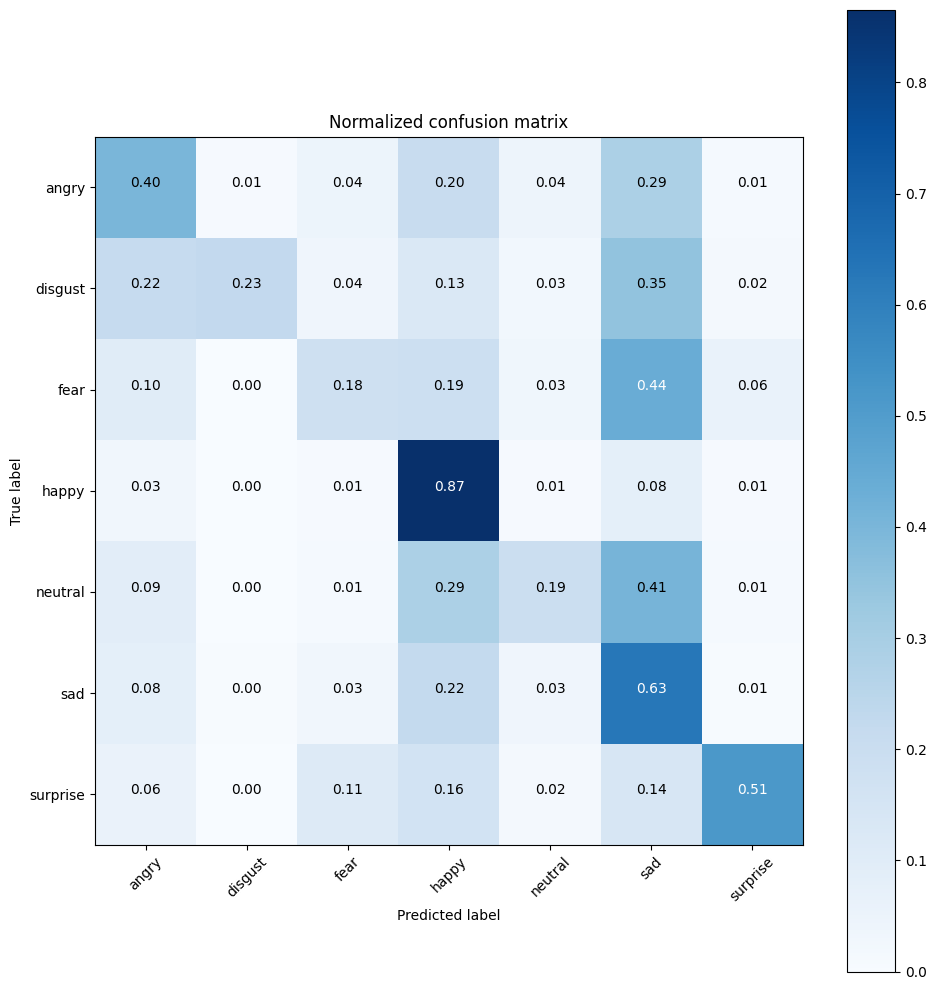

In [10]:
predictions = model.predict_generator(generator=validation_generator)
y_pred = [np.argmax(probas) for probas in predictions]
y_test = validation_generator.classes
class_names = validation_generator.class_indices.keys()

from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Normalized confusion matrix')
plt.show()

# Accuracy of model

In [11]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.4997169544296632
